# Mapping LA City and County Public Libraries
## Author: Sophie Frank

Using the Libraries dataset from LA GeoHub, I will separate the data on the City of LA Public Library and LA County Public Library and then map their locations.

I start by importing pandas and geopandas and then uploading the Libraries file.

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
libraries = pd.read_csv('Libraries - City_County.csv')
libraries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          160 non-null    float64
 1   Y          160 non-null    float64
 2   OBJECTID   160 non-null    int64  
 3   org_name   160 non-null    object 
 4   Name       160 non-null    object 
 5   addrln1    160 non-null    object 
 6   city       160 non-null    object 
 7   state      160 non-null    object 
 8   post_id    160 non-null    int64  
 9   zip        160 non-null    int64  
 10  latitude   160 non-null    float64
 11  longitude  160 non-null    float64
 12  POINT_X    160 non-null    float64
 13  POINT_Y    160 non-null    float64
dtypes: float64(6), int64(3), object(5)
memory usage: 17.6+ KB


I see that there are no null cells. I then proceed to look at a sample of the dataframe.

In [3]:
libraries.sample(5)

,X,Y,OBJECTID,org_name,Name,addrln1,city,state,post_id,zip,latitude,longitude,POINT_X,POINT_Y
18,-118.225698,33.895541,63021,LA County,LA County Library - Compton Library,240 W Compton Blvd,Compton,CA,70501,90220,33.895541,-118.225698,6493175.706,1784442.209
35,-118.395946,33.864450,63074,LA County,LA County Library - Hermosa Beach Library,550 Pier Ave,Hermosa Beach,CA,70518,90254,33.864450,-118.395945,6441464.736,1773287.332
78,-117.940540,34.070652,63190,LA County,LA County Library - Urban Outreach Bookmobile,1601 W West Covina Pkwy,West Covina,CA,70561,91790,34.070652,-117.940539,6579677.672,1848097.379
148,-118.486228,34.235474,60828,City of LA,Los Angeles Public Library - Mid-Valley Region...,16244 Nordhoff St.,Los Angeles,CA,61449,91343,34.235474,-118.486228,6414709.086,1908429.212
64,-118.100809,33.968921,63157,LA County,LA County Library - Rivera Library,7828 Serapis Ave,Pico Rivera,CA,70549,90660,33.968921,-118.100809,6531103.715,1811085.519


For this exercise, I just want to look at the organization, library name, zip code, and geographic coordinates.

In [56]:
desired_columns = ['org_name','Name','city', 'zip', 'latitude', 'longitude']

In [57]:
libraries_trimmed = libraries[desired_columns].copy()
libraries_trimmed.head()

,org_name,Name,city,zip,latitude,longitude
0,LA County,LA County Library - A C Bilbrew Library,Los Angeles,90061,33.916229,-118.272075
1,LA County,LA County Library - Agoura Hills Library,Agoura Hills,91301,34.143205,-118.775331
2,LA County,LA County Library - Alondra Library,Norwalk,90650,33.887956,-118.078456
3,LA County,LA County Library - Angelo M. Iacoboni Library,Lakewood,90712,33.848716,-118.133336
4,LA County,LA County Library - Antelope Valley Bookmobile,Lancaster,93534,34.698131,-118.139522


Now I've trimmed the data so that I only have the columns I deem necessary.

## Filtering County and City Libraries

Next I am going to separate the data into two dataframes--one for city libraries and one for county libraries--so that I can assign them different characteristics when I map the data points.

I start with the LA County Public Library.

In [6]:
libraries_trimmed.loc[libraries_trimmed['org_name'] == 'LA County']

,org_name,Name,city,zip,latitude,longitude
0,LA County,LA County Library - A C Bilbrew Library,Los Angeles,90061,33.916229,-118.272075
1,LA County,LA County Library - Agoura Hills Library,Agoura Hills,91301,34.143205,-118.775331
2,LA County,LA County Library - Alondra Library,Norwalk,90650,33.887956,-118.078456
3,LA County,LA County Library - Angelo M. Iacoboni Library,Lakewood,90712,33.848716,-118.133336
4,LA County,LA County Library - Antelope Valley Bookmobile,Lancaster,93534,34.698131,-118.139522
...,...,...,...,...,...,...
82,LA County,LA County Library - West Hollywood Library,West Hollywood,90069,34.081673,-118.383376
83,LA County,LA County Library - Westlake Village Library,Westlake Village,91361,34.144475,-118.799099
84,LA County,LA County Library - Willowbrook Library,Los Angeles,90059,33.925432,-118.238994
85,LA County,LA County Library - Wiseburn Library,Hawthorne,90250,33.909533,-118.373157


I want to make sure I have all the county libraries included, so I adjust the pandas settings to display all rows.

In [59]:
pd.set_option('display.max_rows', None)

Then I check the dataframe to see all of the county libaries that I have filtered for.

In [9]:
countylib = libraries_trimmed.loc[libraries_trimmed['org_name'] == 'LA County']
countylib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   org_name   87 non-null     object 
 1   Name       87 non-null     object 
 2   city       87 non-null     object 
 3   zip        87 non-null     int64  
 4   latitude   87 non-null     float64
 5   longitude  87 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


In [8]:
libraries_trimmed.loc[libraries_trimmed['org_name'] == 'LA County']

,org_name,Name,city,zip,latitude,longitude
0,LA County,LA County Library - A C Bilbrew Library,Los Angeles,90061,33.916229,-118.272075
1,LA County,LA County Library - Agoura Hills Library,Agoura Hills,91301,34.143205,-118.775331
2,LA County,LA County Library - Alondra Library,Norwalk,90650,33.887956,-118.078456
3,LA County,LA County Library - Angelo M. Iacoboni Library,Lakewood,90712,33.848716,-118.133336
4,LA County,LA County Library - Antelope Valley Bookmobile,Lancaster,93534,34.698131,-118.139522
5,LA County,LA County Library - Anthony Quinn Library,Los Angeles,90063,34.040714,-118.180207
6,LA County,LA County Library - Artesia Library,Artesia,90701,33.860596,-118.079085
7,LA County,LA County Library - Avalon Library,Avalon,90704,33.343074,-118.327314
8,LA County,LA County Library - Baldwin Park Library,Baldwin Park,91706,34.088062,-117.965424
9,LA County,LA County Library - Bell Gardens Library,Bell Gardens,90201,33.967138,-118.150555


This all looks correct, so I convert the dataframe to a geodataframe.

In [53]:
geocountylib = gpd.GeoDataFrame(countylib, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(countylib.longitude, countylib.latitude))

I then check to make sure that a geometry column was added and that the dataframe now contains geographic data.

In [13]:
countylib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   org_name   87 non-null     object  
 1   Name       87 non-null     object  
 2   city       87 non-null     object  
 3   zip        87 non-null     int64   
 4   latitude   87 non-null     float64 
 5   longitude  87 non-null     float64 
 6   geometry   87 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 5.4+ KB


In [11]:
geocountylib.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Next I do the same for the City of LA Public Library. I start by filtering for 'City of LA' under org_name.

In [12]:
libraries_trimmed.loc[libraries_trimmed['org_name'] == 'City of LA']

,org_name,Name,city,zip,latitude,longitude
87,City of LA,Los Angeles Public Library - Van Nuys Branch,Los Angeles,91401,34.183775,-118.446379
88,City of LA,Los Angeles Public Library - Alma Reaves Woods...,Los Angeles,90002,33.943847,-118.246428
89,City of LA,Los Angeles Public Library - Mark Twain Branch,Los Angeles,90003,33.948675,-118.282863
90,City of LA,Los Angeles Public Library - San Pedro Regiona...,Los Angeles,90731,33.735490,-118.292486
91,City of LA,Los Angeles Public Library - Robertson Branch,Los Angeles,90035,34.048354,-118.385804
92,City of LA,Los Angeles Public Library - Jefferson - Vassi...,Los Angeles,90018,34.025695,-118.319242
93,City of LA,Los Angeles Public Library - Donald Bruce Kauf...,Los Angeles,90049,34.052813,-118.468621
94,City of LA,Los Angeles Public Library - Wilshire Branch,Los Angeles,90004,34.074347,-118.311517
95,City of LA,Los Angeles Public Library - Washington Irving...,Los Angeles,90018,34.040037,-118.329130
96,City of LA,Los Angeles Public Library - Vermont Square Br...,Los Angeles,90037,33.999722,-118.295962


In [60]:
lapl = libraries_trimmed.loc[libraries_trimmed['org_name'] == 'City of LA']
lapl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 87 to 159
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   org_name   73 non-null     object 
 1   Name       73 non-null     object 
 2   city       73 non-null     object 
 3   zip        73 non-null     int64  
 4   latitude   73 non-null     float64
 5   longitude  73 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.0+ KB


Now I convert this dataframe to a geodataframe as well.

In [15]:
geolapl = gpd.GeoDataFrame(lapl, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(lapl.longitude, lapl.latitude))

I check to make sure that it now contains geographic data.

In [16]:
geolapl.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 73 entries, 87 to 159
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   org_name   73 non-null     object  
 1   Name       73 non-null     object  
 2   city       73 non-null     object  
 3   zip        73 non-null     int64   
 4   latitude   73 non-null     float64 
 5   longitude  73 non-null     float64 
 6   geometry   73 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 4.6+ KB


In [17]:
geolapl.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Mapping

Now that I have my two geodataframes, I am ready to map them.

In [18]:
import matplotlib.pyplot as plt
import contextily as ctx

I start by checking the LA County geodataframe.

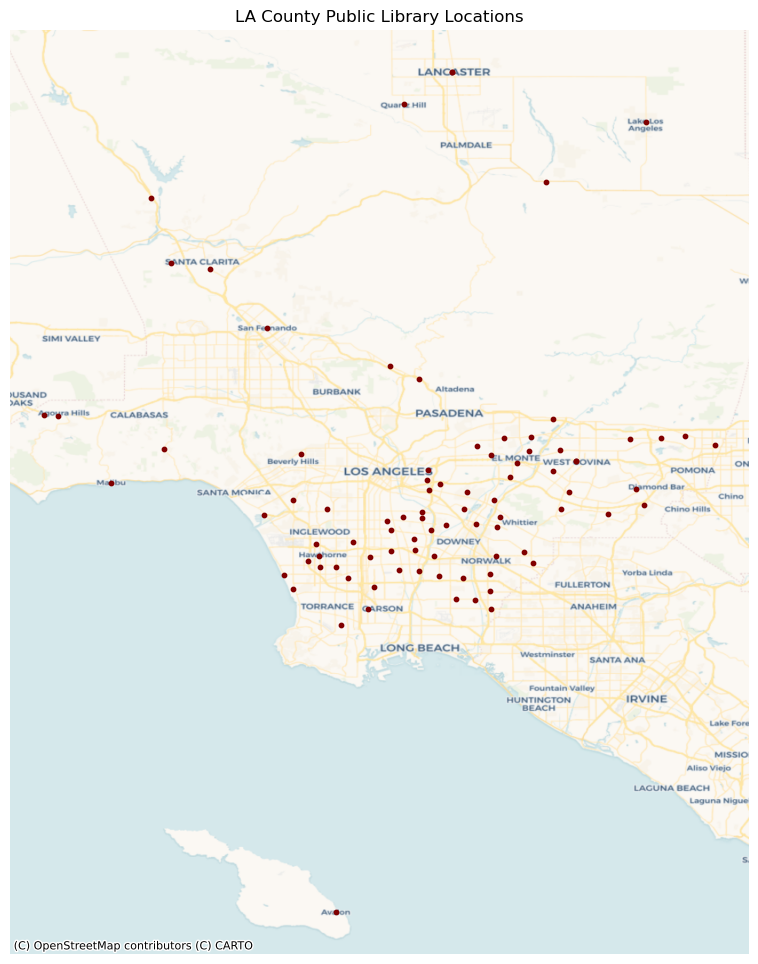

In [19]:
fig, ax = plt.subplots(figsize=(12,12))

geocountylib.plot(ax=ax, 
        marker='o',
        markersize=10,
        color='#800000')

ax.axis('off')

ax.set_title('LA County Public Library Locations')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, crs=4326)

I then map the City of LA libraries.

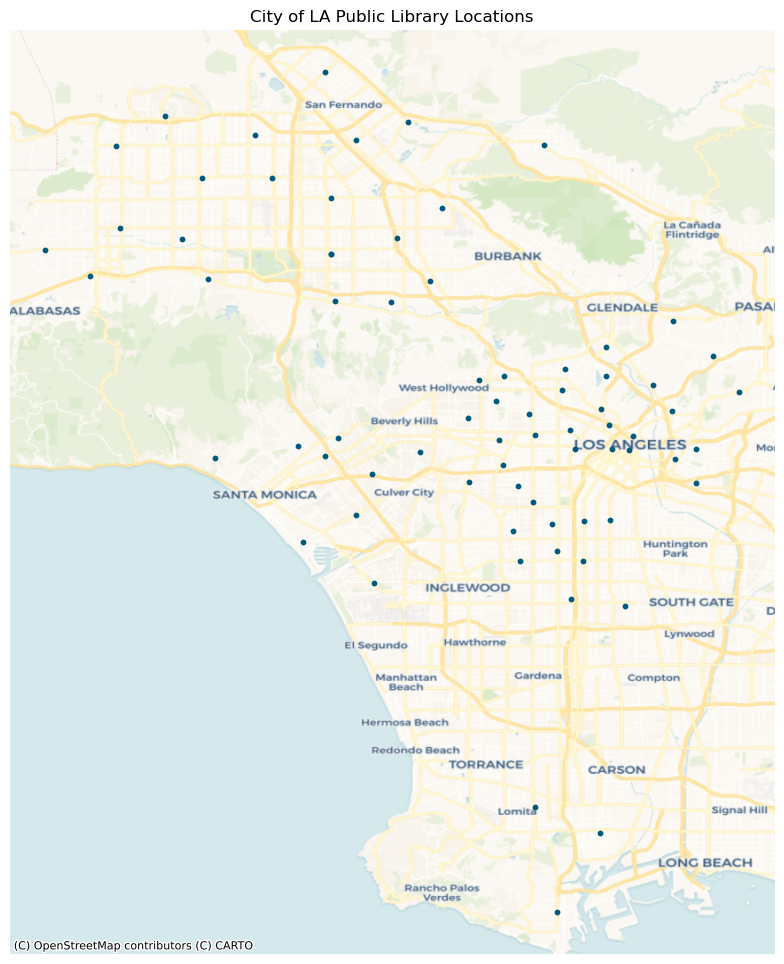

In [21]:
fig, ax = plt.subplots(figsize=(12,12))

geolapl.plot(ax=ax, 
        marker='o',
        markersize=10,
        color='#005a80')

ax.axis('off')

ax.set_title('City of LA Public Library Locations')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, crs=4326)

Now I will combine the two geodataframes on one map.

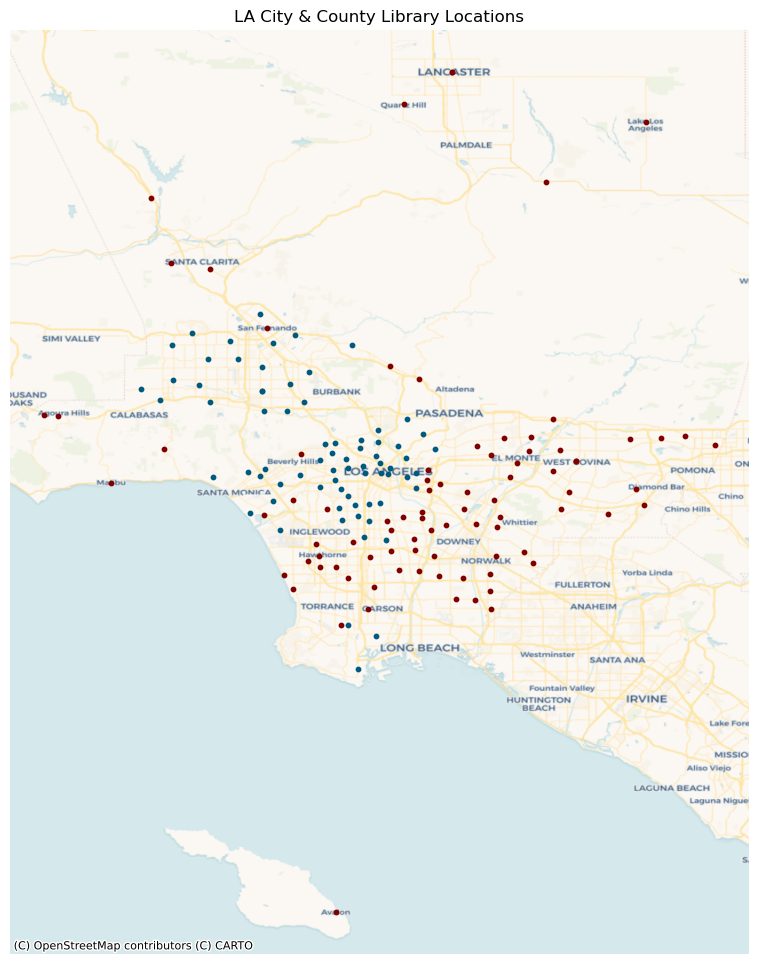

In [32]:
fig, ax = plt.subplots(figsize=(12,12))

geolapl.plot(ax=ax, 
        marker='o',
        markersize=10,
        color='#005a80')

geocountylib.plot(ax=ax, 
        marker='o',
        markersize=10,
        color='#800000')

ax.axis('off')

ax.set_title('LA City & County Library Locations')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, crs=4326)

There are quite a few County library locations that will not be needed for this project as we want to look at ones that are close to the boundaries of the City of LA. I will add a layer containing the boundaries for now and do additional data cleaning later on.

In [26]:
city_gdf = gpd.read_file('City_Boundaries.zip')

<AxesSubplot: >

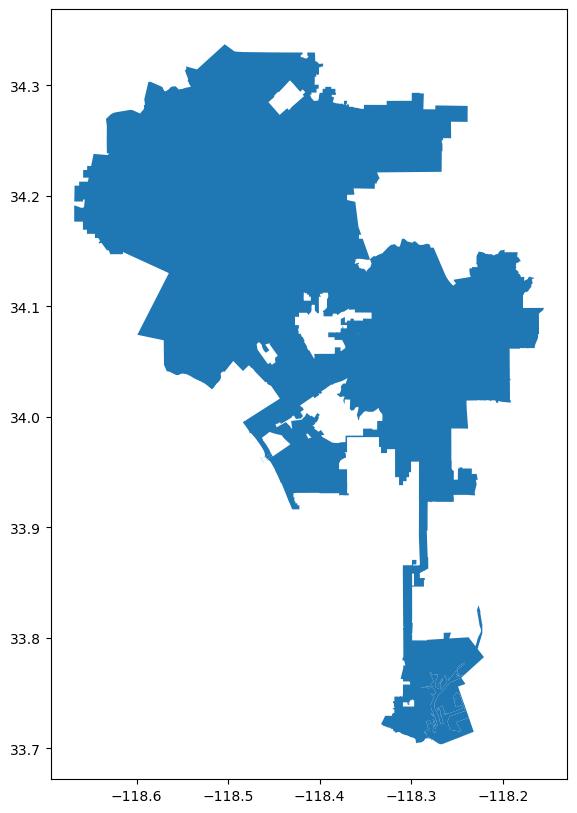

In [28]:
city_gdf.plot(figsize=(12,10))

This is the boundary I am looking for. I test out a different appearance before adding it to the map of libraries.

<AxesSubplot: >

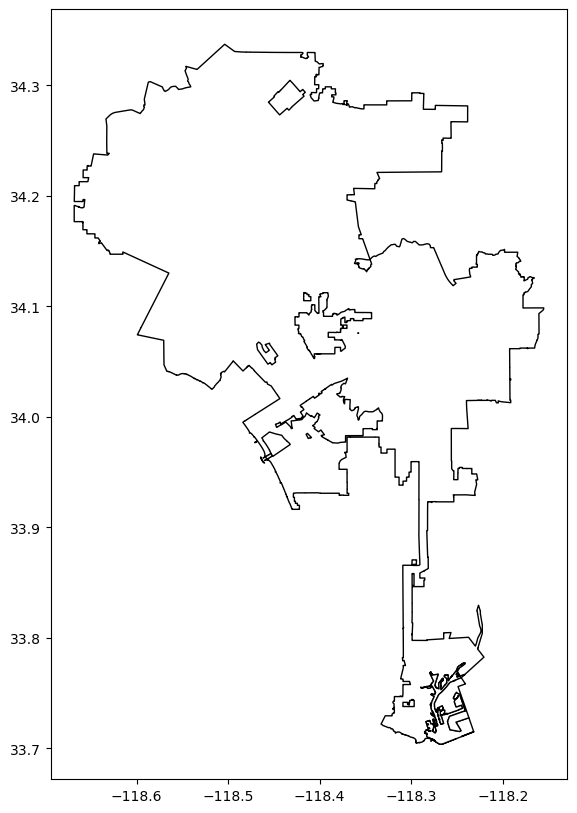

In [31]:
city_gdf.plot(figsize=(12,10), color='white', edgecolor='black')

Next I combine the three layers into one map and add a legend.

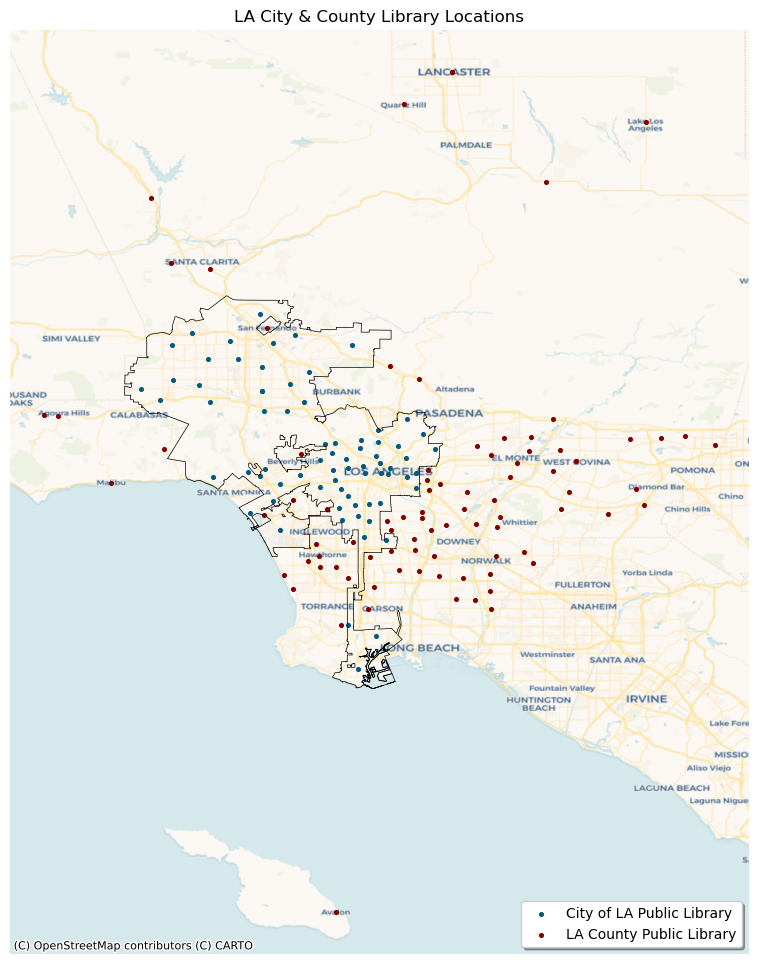

In [65]:
fig, ax = plt.subplots(figsize=(12,12))

geolapl.plot(ax=ax, 
        marker='o',
        markersize=7,
        color='#005a80',
        label='City of LA Public Library')

geocountylib.plot(ax=ax, 
        marker='o',
        markersize=7,
        color='#800000',
        label='LA County Public Library')

city_gdf.plot(ax=ax,
        facecolor='none',
        edgecolor='black',
        linewidth=0.5)

legend = ax.legend(loc='lower right', shadow=True, fontsize='medium')

ax.axis('off')

ax.set_title('LA City & County Library Locations')

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager, crs=4326)